In [2]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers.pipelines.pt_utils import KeyDataset
from datasets import load_dataset
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import io
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import re
import datetime

# Sentimental Analysis

## https://www.youtube.com/watch?v=GSt00_-0ncQ used this youtube video

In [3]:
# setting the path for joining multiple files
files = os.path.join("../Emilia/", "best_products_for_sentimental_***.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
        Unnamed: 0                                            Product  \
0                0                  Andrex Gentle Clean Toilet Tissue   
1                1                  Andrex Gentle Clean Toilet Tissue   
2                2                  Andrex Gentle Clean Toilet Tissue   
3                3                  Andrex Gentle Clean Toilet Tissue   
4                4                  Andrex Gentle Clean Toilet Tissue   
...            ...                                                ...   
122468      122468            AnySharp Knife Sharpener with PowerGrip   
122469      122469  Garnier Hand Repair Intensive Restoring Hand C...   
122470      122470  Garnier Hand Repair Intensive Restoring Hand C...   
122471      122471  Garnier Hand Repair Intensive Restoring Hand C...   
122472      122472  Linda's Silicone Stove Gap Covers (2 Pack), He...   

        Individual Review        Location  \
0       

In [39]:
dataset = df["Review"].tolist()
dataset

['\n  Why the change of price for those of us who regularly buy this sort of amount of toilet rolls, especially when the price increase is due to a totally unnecessary demand from overbuying clowns panicking about T Rolls which are entirely unrelated to the obvious, current situation.To be not told, and supposed to guess the price is not good enough and to be at the mercy of, as I say, this ridiculous over buying by the panic squad, and the supplies of this item. What happens 6 months from now when they are no longer buying and I am, so I deserve the usual old price and not some overpriced item caused by the panic squad with more money than sense.Please rebate for those of us not causing the panicking and not liable for price increases like this.\n',
 'I never thought that I still need to read any reviews when I was buying this Andrex toilet paper that I have been used for many years.\n\nJust like others bad comments and photo upload, the size of this Andrex toilet paper is extremely s

In [11]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, truncation = True, padding = True, max_length = 512)

### For creating pipeline

In [12]:
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer = tokenizer, device = 0, truncation=True)

#results = classifier(dataset)
#results = classifier(df_covd_dates['Review'])
#for result in results(KeyDataset(dataset), batch_size = 8):
#    print(result)

In [40]:
results = classifier(dataset)

In [44]:
results[0:5]

[{'label': 'NEGATIVE', 'score': 0.9997300505638123},
 {'label': 'NEGATIVE', 'score': 0.9988887906074524},
 {'label': 'NEGATIVE', 'score': 0.9979450106620789},
 {'label': 'NEGATIVE', 'score': 0.9989913105964661},
 {'label': 'NEGATIVE', 'score': 0.9990931749343872}]

In [41]:
df_sentimental= pd.DataFrame (results)

In [65]:
df_sentimental

,label,score
0,NEGATIVE,0.999730
1,NEGATIVE,0.998889
2,NEGATIVE,0.997945
3,NEGATIVE,0.998991
4,NEGATIVE,0.999093
...,...,...
122468,POSITIVE,0.972497
122469,POSITIVE,0.996305
122470,POSITIVE,0.997127
122471,POSITIVE,0.999831


# Merge sentimental and products

In [70]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [71]:
df_sentimental_with_products = []
df_sentimental_with_products = df
df_sentimental_with_products = df_sentimental_with_products.join(df_sentimental)
df_sentimental_with_products

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,Date,label,score
0,Andrex Gentle Clean Toilet Tissue,Overpriced nonsense,Mr R H Angus,2.0,United Kingdom,Verified Purchase,\n Why the change of price for those of us wh...,2,2020-03-19,NEGATIVE,0.999730
1,Andrex Gentle Clean Toilet Tissue,Absolutely not worth the money,yc chai,1.0,United Kingdom,Verified Purchase,I never thought that I still need to read any ...,3,2020-05-30,NEGATIVE,0.998889
2,Andrex Gentle Clean Toilet Tissue,CON,Customer in York,1.0,United Kingdom,Verified Purchase,\n We brought Andrex multi on a few occasions...,2,2020-01-05,NEGATIVE,0.997945
3,Andrex Gentle Clean Toilet Tissue,Sad sad sad,El,1.0,United Kingdom,Verified Purchase,"\n Disappointed in these thinned out, less de...",2,2020-03-09,NEGATIVE,0.998991
4,Andrex Gentle Clean Toilet Tissue,Beware - inferior quality,Kenkonti,1.0,United Kingdom,Verified Purchase,\n This product sums up the pitfalls of buyin...,2,2020-06-24,NEGATIVE,0.999093
...,...,...,...,...,...,...,...,...,...,...,...
122468,AnySharp Knife Sharpener with PowerGrip,Make your own razors,Cupid Stunt,5.0,United Kingdom,Verified Purchase,"\n This is proper, will take metal shavings o...",0,2020-01-24,POSITIVE,0.972497
122469,Garnier Hand Repair Intensive Restoring Hand C...,Ideal product,Amazon Customer,5.0,United Kingdom,Verified Purchase,\n A****\n,0,2020-05-09,POSITIVE,0.996305
122470,Garnier Hand Repair Intensive Restoring Hand C...,Good and Cheap,Paul Fadur,5.0,United Kingdom,Verified Purchase,\n Good and Cheap for value\n,0,2020-02-22,POSITIVE,0.997127
122471,Garnier Hand Repair Intensive Restoring Hand C...,Repair dry hand very well,Paul Bell,5.0,United Kingdom,Verified Purchase,\n Very good hand cream\n,0,2020-02-18,POSITIVE,0.999831


In [77]:
df_group = df_sentimental_with_products.groupby(["Date", "label"]).count()

In [78]:
df_group

Product  Title of Review  Name  Individual Review  \
Date       label                                                         
2019-12-02 NEGATIVE       71               66    71                 71   
           POSITIVE      188              164   188                188   
2019-12-03 NEGATIVE       83               67    83                 83   
           POSITIVE      243              207   243                243   
2019-12-04 NEGATIVE      110               97   110                110   
...                      ...              ...   ...                ...   
2020-07-30 POSITIVE      389              346   389                389   
2020-07-31 NEGATIVE      116               99   116                116   
           POSITIVE      293              251   293                293   
2020-08-01 NEGATIVE      140              123   140                140   
           POSITIVE      322              282   322                322   

                     Location  State  Review  Helpful  score  
Date       label                                              
2019-12-02 NEGATIVE        71     68      71       71     71  
           POSITIVE       188    180     188      188    188  
2019-12-03 NEGATIVE        83     81      83       83     83  
           POSITIVE       243    237     243      243    243  
2019-12-04 NEGATIVE       110    107     110      110    110  
...                       ...    ...     ...      ...    ...  
2020-07-30 POSITIVE       389    383     389      389    389  
2020-07-31 NEGATIVE       116    113     116      116    116  
           POSITIVE       293    292     293      293    293  
2020-08-01 NEGATIVE       140    139     140      140    140  
           POSITIVE       322    316     322      322    322  

[488 rows x 9 columns]

In [79]:
df_group.describe()

,Product,Title of Review,Name,Individual Review,Location,State,Review,Helpful,score
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,250.969262,220.928279,250.956967,250.969262,250.969262,246.225410,250.969262,250.969262,250.969262
std,134.228945,121.679760,134.214362,134.228945,134.228945,132.785767,134.228945,134.228945,134.228945
min,56.000000,45.000000,56.000000,56.000000,56.000000,54.000000,56.000000,56.000000,56.000000
25%,133.000000,116.000000,133.000000,133.000000,133.000000,129.000000,133.000000,133.000000,133.000000
50%,188.000000,167.000000,188.000000,188.000000,188.000000,182.500000,188.000000,188.000000,188.000000
75%,371.000000,329.000000,371.000000,371.000000,371.000000,364.250000,371.000000,371.000000,371.000000
max,635.000000,567.000000,635.000000,635.000000,635.000000,626.000000,635.000000,635.000000,635.000000


<Figure size 2160x1152 with 0 Axes>

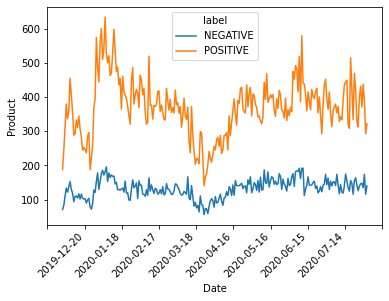

<Figure size 2160x1152 with 0 Axes>

In [49]:
sns.lineplot(data=df_group, x = "Date", y= "Product",  hue = "label")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation=45, ha='right')
plt.figure(figsize = (30,16))